Setup and imports

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Set visual style
sns.set_theme(style="whitegrid")
%matplotlib inline

#Load the main dataset
jobs = pd.read_csv('../data/ai_jobs.csv')
skills = pd.read_csv('../data/skills_demand.csv')
mapping = pd.read_csv('../data/job_title_mapping.csv')

#calculation skill_count
skill_count = skills.groupby('job_id').size().reset_index(name='skill_count')

Quick Data Inspection

In [9]:
print(f"Dataset contains {jobs.shape[0]} job listings")
print(jobs.info())

#Check for missing values
print("\nMissing values:\n", jobs.isnull().sum())

#Preview salary distributions
jobs[['salary_min_usd', 'salary_max_usd']].describe()

Dataset contains 50000 job listings
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   job_id                50000 non-null  object
 1   job_title             50000 non-null  object
 2   company_type          50000 non-null  object
 3   industry              50000 non-null  object
 4   country               50000 non-null  object
 5   city                  50000 non-null  object
 6   remote_type           50000 non-null  object
 7   experience_level      50000 non-null  object
 8   min_experience_years  50000 non-null  int64 
 9   salary_min_usd        50000 non-null  int64 
 10  salary_max_usd        50000 non-null  int64 
 11  employment_type       50000 non-null  object
 12  posted_year           50000 non-null  int64 
 13  company_size          50000 non-null  object
dtypes: int64(4), object(10)
memory usage: 5.3+ MB
None

,salary_min_usd,salary_max_usd
count,50000.000000,50000.000000
mean,100871.434320,120858.350740
std,37043.446641,37531.386484
min,50000.000000,65000.000000
25%,61287.000000,83739.000000
50%,97505.000000,117604.000000
75%,143730.500000,161348.750000
max,154999.000000,180000.000000


Visualizing Salary vs Experience(EDA)

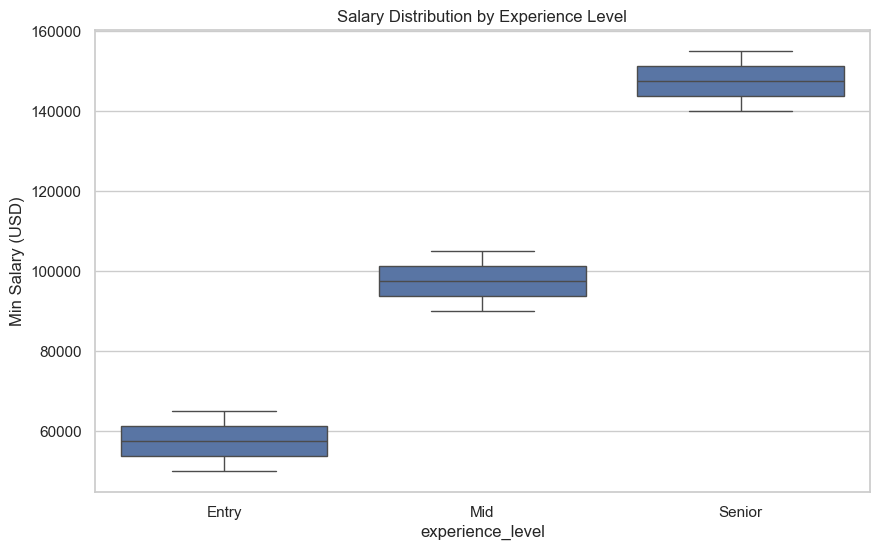

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=jobs, x='experience_level', y='salary_min_usd',
            order=['Entry', 'Mid', 'Senior'])
plt.title('Salary Distribution by Experience Level')
plt.ylabel('Min Salary (USD)')
plt.show()

Prototyping the %data_loader% logic

In [13]:
#Prototype: How many skills does each job have?
skills_per_job = skills.groupby('job_id').size().reset_index(name='skill_count')

#Merge with main jobs dataframe
df_merged = jobs.merge(skills_per_job, on='job_id', how='left')
df_merged['skill_count'] = df_merged['skill_count'].fillna(0)

#Verify the join worked
print(df_merged[['job_title', 'skill_count']].head())

                   job_title  skill_count
0             MLOps Engineer          0.0
1               Data Analyst          4.0
2             MLOps Engineer          4.0
3          Applied Scientist          5.0
4  Machine Learning Engineer          0.0


Identify Top Skills

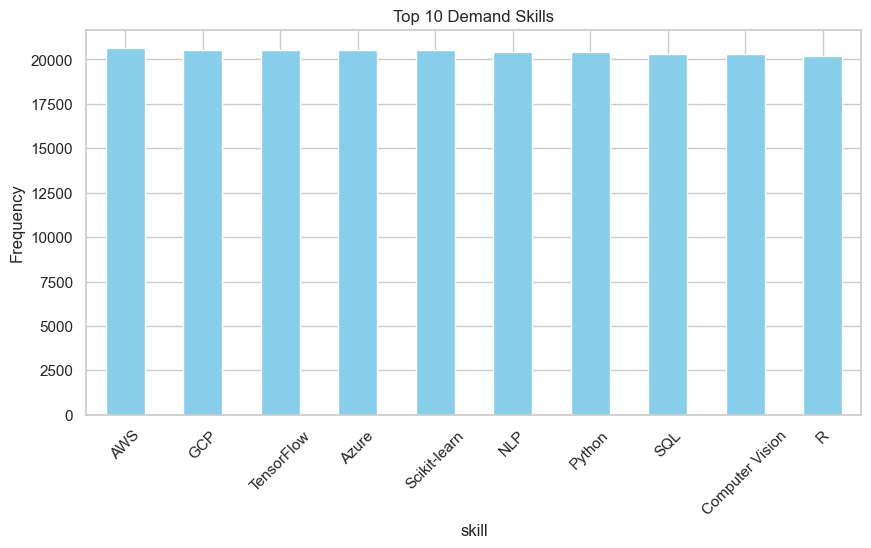

In [14]:
top_skills = skills['skill'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_skills.plot(kind='bar', color='skyblue')
plt.title('Top 10 Demand Skills')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Corrolation Analysis.


You check which numerical values move together (e.g., does min_experience_years strongly correlate with salary_min_usd?).

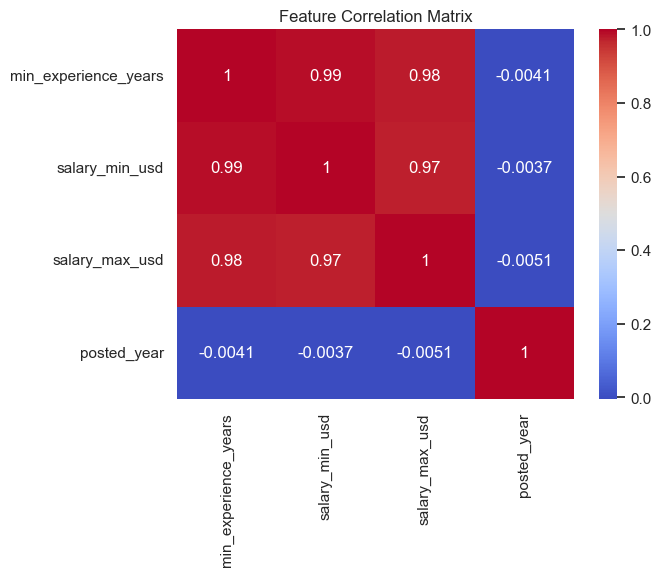

In [15]:
#Select numeric columns for correlation
numeric_cols = jobs.select_dtypes(include=['int64', 'float64']).columns
corr = jobs[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()